Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

Generate a real dataset

In [26]:
def true_function(x):
    return np.sin(2 * np.pi * x)  # Underlying true function

np.random.seed(42)
X = np.sort(np.random.rand(200, 1) * 2 - 1, axis=0)  # Generate X in range [-1,1]
y = true_function(X).ravel() + np.random.normal(0, 0.3, X.shape[0])  # Add Gaussian noise

Split into training and test sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

Define model complexities (polynomial degrees)

In [29]:
degrees = np.arange(1, 21)
train_errors, test_errors = [], []

Train models and compute errors

In [30]:
for d in degrees:
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(X_train, y_train)

    train_errors.append(mean_squared_error(y_train, model.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, model.predict(X_test)))

Bias-Variance tradeoff visualization

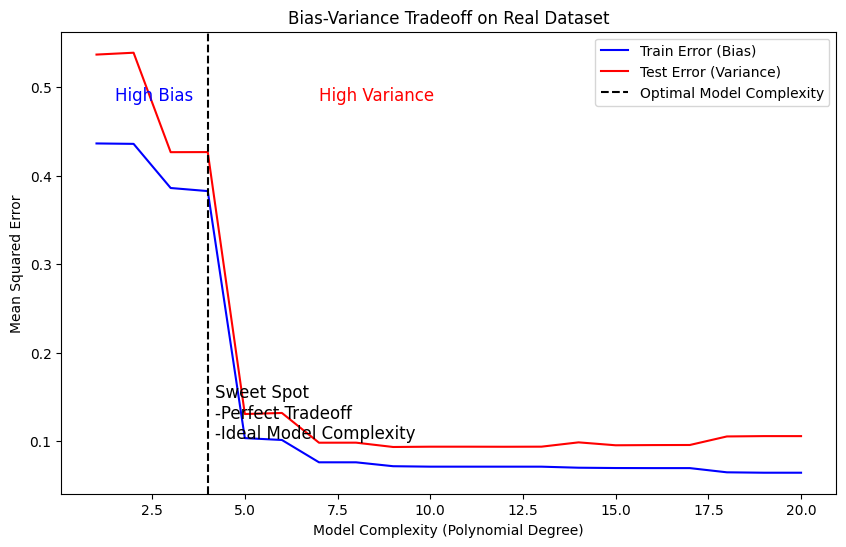

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Train Error (Bias)', color='blue')
plt.plot(degrees, test_errors, label='Test Error (Variance)', color='red')
plt.axvline(x=4, linestyle='--', color='black', label='Optimal Model Complexity')

# Annotate the graph
plt.text(1.5, max(test_errors)*0.9, 'High Bias', fontsize=12, color='blue')
plt.text(7, max(test_errors)*0.9, 'High Variance', fontsize=12, color='red')
plt.text(4.2, min(test_errors)*1.1, 'Sweet Spot\n-Perfect Tradeoff\n-Ideal Model Complexity', fontsize=12)

# Labels and title
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff on Real Dataset')
plt.legend()
plt.show()

- Train error (blue) decreases as model complexity increases (low bias but high variance).

- Test error (red) decreases initially but increases after a certain complexity due to overfitting.

- The sweet spot represents the optimal model complexity with minimal test error.

      Bias: Measures how much the model's predictions deviate from the true values (high bias = underfitting).
      
      Variance: Measures how much predictions vary for different training datasets (high variance = overfitting).

    Bias-Variance Formulae:
        Bias^2 = (E[f_hat(x)] - f(x))^2  # Difference between expected prediction and true function.
        Variance = E[(f_hat(x) - E[f_hat(x)])^2]  # Variability of predictions over different training sets.